In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import scipy
RANDOM_SEED = 42

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Dell


In [3]:
#Setting current working directory
os.chdir("/Users/Zahed/Micro Credit Project")

In [4]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Zahed\Micro Credit Project


In [5]:
#importing Dataset
df=pd.read_csv("Data file.csv")
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [6]:
df.shape

(209593, 37)

We Have 209593 rows and 37 columns in dataset

In [7]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

We have float type value in most of the independent variables also some int type variable and object type variable
and label is our target variable where in we have our classes '0' & '1'

In [8]:
#Finding missing values in the dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no Missing Values in dataset

In [9]:
df['label'].unique()

array([0, 1], dtype=int64)

There are 2 unique values in df['label']

In [10]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

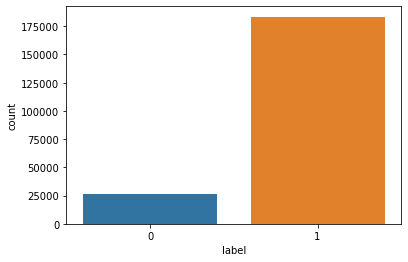

In [11]:
sn.countplot(df['label']);

In [12]:
#Finding Co relation for all the columns
cor =df.corr()

In [13]:
cor

Unnamed: 0     label       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403 -0.002048      0.002739   
label                   0.000403  1.000000 -0.003785      0.168298   
aon                    -0.002048 -0.003785  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30             0.001725  0.196283 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.001940      0.026915   
payback90               0.002411  0.049183  0.002203      0.047175   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036

As for the heatmap we can clearly observe that none of the features are strongly co related to target variable

EDA

Univariate analysis

In [14]:
from scipy.stats import skew

In [15]:
print(df.columns.values)

['Unnamed: 0' 'label' 'msisdn' 'aon' 'daily_decr30' 'daily_decr90'
 'rental30' 'rental90' 'last_rech_date_ma' 'last_rech_date_da'
 'last_rech_amt_ma' 'cnt_ma_rech30' 'fr_ma_rech30' 'sumamnt_ma_rech30'
 'medianamnt_ma_rech30' 'medianmarechprebal30' 'cnt_ma_rech90'
 'fr_ma_rech90' 'sumamnt_ma_rech90' 'medianamnt_ma_rech90'
 'medianmarechprebal90' 'cnt_da_rech30' 'fr_da_rech30' 'cnt_da_rech90'
 'fr_da_rech90' 'cnt_loans30' 'amnt_loans30' 'maxamnt_loans30'
 'medianamnt_loans30' 'cnt_loans90' 'amnt_loans90' 'maxamnt_loans90'
 'medianamnt_loans90' 'payback30' 'payback90' 'pcircle' 'pdate']


<AxesSubplot:>

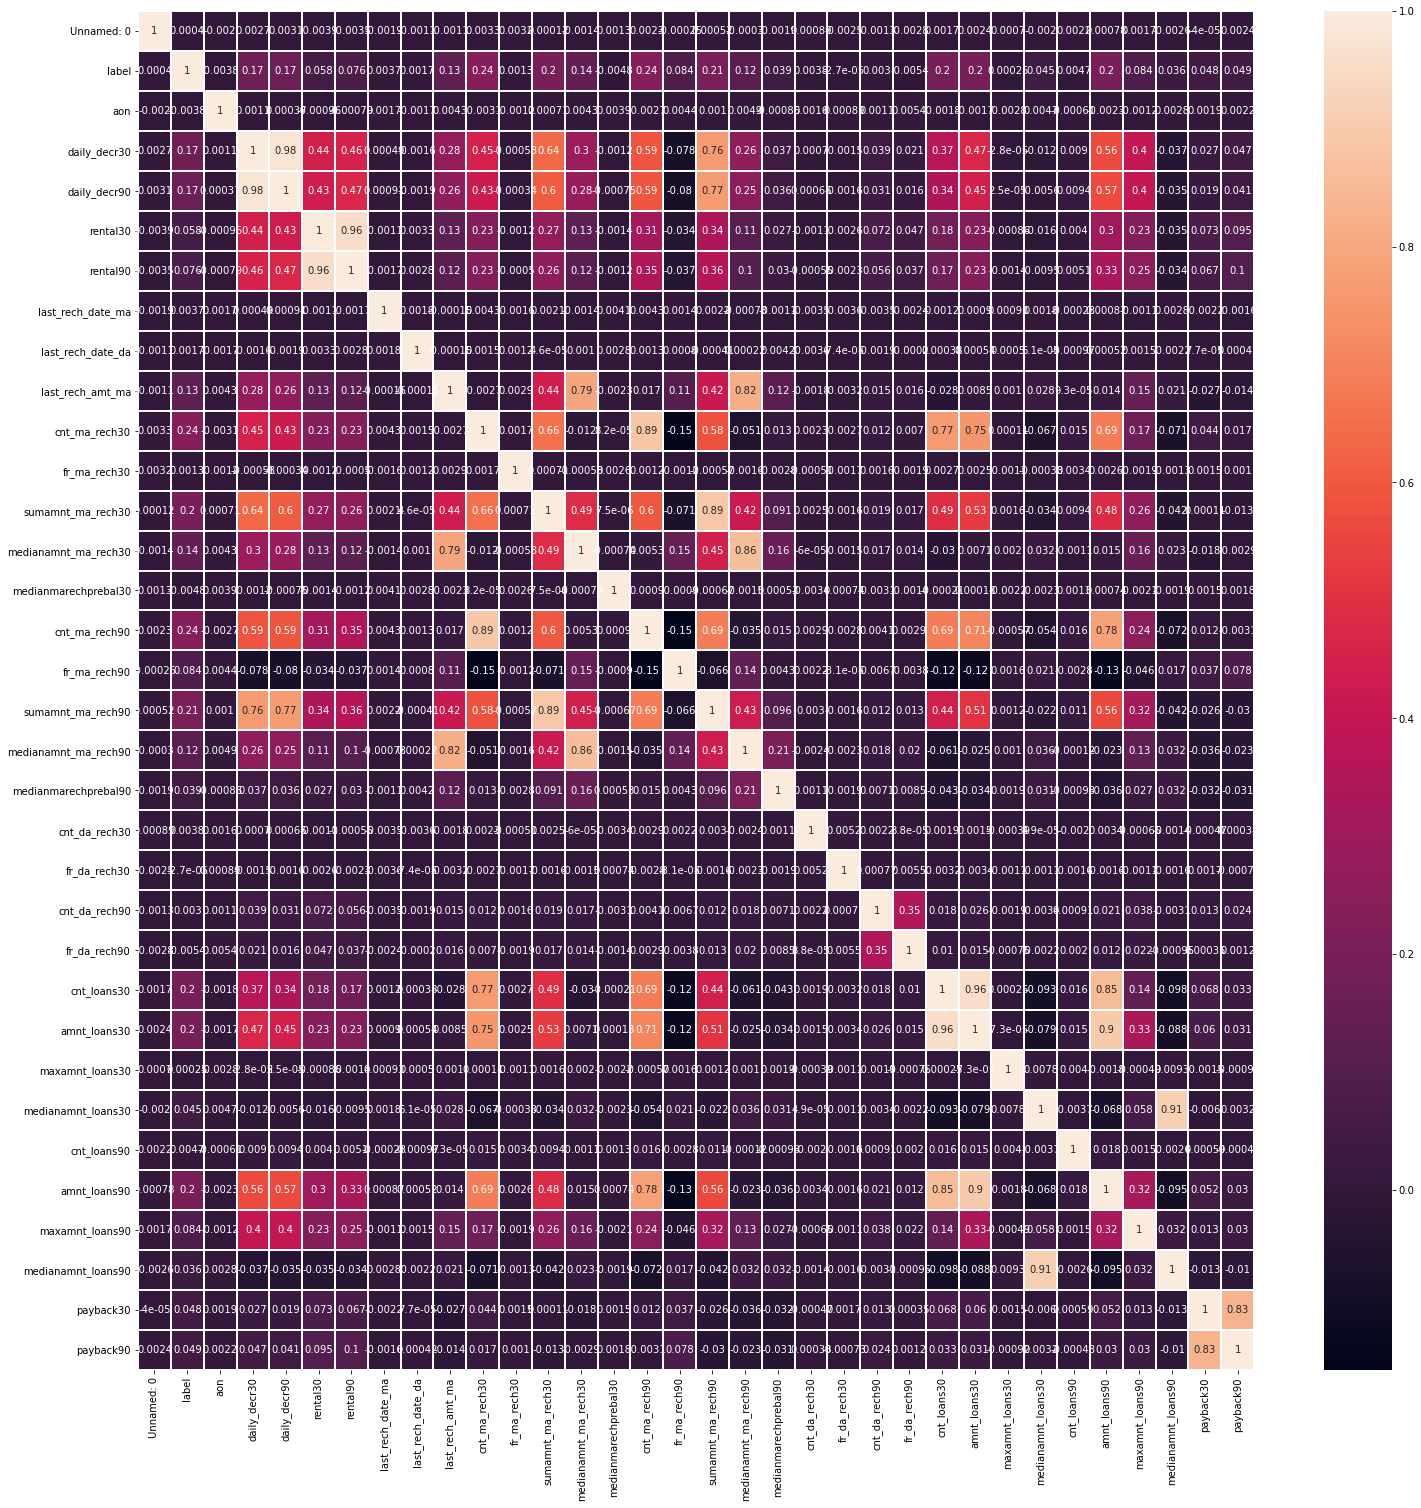

In [82]:
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cor,annot=True,linewidths=1,linecolor='white')

Outlier Removal

As for the heatmap we can clearly observe that none of the features are strongly co related to target variable

In [17]:
new_df = df[['aon' ,'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da','last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30' ,'sumamnt_ma_rech30','medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90' ,'medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30' ,'fr_da_rech30' ,'cnt_da_rech90','fr_da_rech90', 'cnt_loans30' ,'amnt_loans30', 'maxamnt_loans30','medianamnt_loans30' ,'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']]

In [18]:
new_df

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228333  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0               21.0  ...            2            12              6.0   
1                0.0  ...            1            12             12.0   
2                0.0  ...            1             6              6.0   
3                0.0  ...            2            12              6.0   
4                2.0  ...            7            42              6.0   
...              ...  ...          ...           ...              ...   
209588           2.0  ...            2            12              6.0   
209589           1.0  ...            3            18              6.0   
209590           8.0  ...            4            42             12.0   
209591           4.0  ...            2            18             12.0   
209592           1.0  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  29.000000  29.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
...                    ...        ...        ...  
209588                 0.0   1.000000   1.000000  
209589                 0.0   1.000000   1.000000  
209590              

In [19]:
new_df.describe()

aon   daily_decr30   daily_decr90       rental30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean     8112.343445    5381.402289    6082.515068    2692.581910   
std     75696.082531    9220.623400   10918.812767    4308.586781   
min       -48.000000     -93.012667     -93.012667  -23737.140000   
25%       246.000000      42.440000      42.692000     280.420000   
50%       527.000000    1469.175667    1500.000000    1083.570000   
75%       982.000000    7244.000000    7802.790000    3356.940000   
max    999860.755168  265926.000000  320630.000000  198926.110000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count  209593.000000      209593.000000      209593.000000     209593.000000   
mean     3483.406534        3755.847800        3712.202921       2064.452797   
std      5770.461279       53905.892230       53374.833430       2370.786034   
min    -24720.580000         -29.000000         -29.000000          0.000000   
25%       300.260000           1.000000           0.000000        770.000000   
50%      1334.000000           3.000000           0.000000       1539.000000   
75%      4201.790000           7.000000           0.000000       2309.000000   
max    200148.110000      998650.377733      999171.809410      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count  209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        3.978057    3737.355121  ...       2.758981      17.952021   
std         4.256090   53643.625172  ...       2.554502      17.379741   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       6.000000   
50%         3.000000       2.000000  ...       2.000000      12.000000   
75%         5.000000       6.000000  ...       4.000000      24.000000   
max       203.000000  999606.368132  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 32 columns]

In [20]:
#Appying Z-Score method to remove outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(new_df))
print(z)

[[0.10357685 0.25229941 0.27634619 ... 0.22959366 2.9046997  2.39409346]
 [0.09776412 0.73103667 0.5533797  ... 0.22959366 0.38562959 0.41923266]
 [0.10010243 0.43201111 0.42903256 ... 0.22959366 0.38562959 0.41923266]
 ...
 [0.09378769 0.70079045 0.53319431 ... 0.22959366 0.06820893 0.04735622]
 [0.08428915 0.77075515 0.59455827 ... 0.22959366 0.38562959 0.59938541]
 [0.08628398 0.09674426 0.14174607 ... 0.22959366 0.38562959 0.41923266]]


values of Z Score for the given Dataset

In [21]:
#Appying Z-Score method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(new_df))
new_df2=new_df [(z<3).all(axis=1) ]

In [22]:
new_df2

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228333  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0               21.0  ...            2            12              6.0   
1                0.0  ...            1            12             12.0   
2                0.0  ...            1             6              6.0   
3                0.0  ...            2            12              6.0   
4                2.0  ...            7            42              6.0   
...              ...  ...          ...           ...              ...   
209588           2.0  ...            2            12              6.0   
209589           1.0  ...            3            18              6.0   
209590           8.0  ...            4            42             12.0   
209591           4.0  ...            2            18             12.0   
209592           1.0  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  29.000000  29.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
...                    ...        ...        ...  
209588                 0.0   1.000000   1.000000  
209589                 0.0   1.000000   1.000000  
209590              

In [23]:
df.shape

(209593, 37)

In [24]:
new_df2.shape

(161465, 32)

In [25]:
(209593-161465)/209593*100

22.962598941758554

By performing Z score method to remove outlier we are loosing about 22.96% data 

In [26]:
#Appying IQR method to remove outliers
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans90             0.000
medianamnt_loa

In [27]:
print(new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))

          aon  daily_decr30  daily_decr90  rental30  rental90  \
0       False         False         False     False     False   
1       False         False         False     False     False   
2       False         False         False     False     False   
3       False         False         False     False     False   
4       False         False         False     False     False   
...       ...           ...           ...       ...       ...   
209588  False         False         False     False     False   
209589  False         False         False     False     False   
209590  False         False         False     False     False   
209591  False         False         False     False     False   
209592  False         False         False     False     False   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                   False              False             False          False   
1                   False              False             

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [28]:
#Appying IQR method to remove outliers
new_df3 = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df3.shape

(70492, 32)

In [29]:
(209593-70492)/209593*100

66.36719737777503

By performing IQR method to remove outlier we are loosing about 66.36% data 

In [30]:
#To Find the skewness on all columns
new_df.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

Skewness Value for each column we can see more than 14 columns are having value above +5

In [31]:
#Applying Quantile method for removing skewness on medianmarechprebal90
min_threshold,max_threshold = new_df.medianmarechprebal90.quantile([0.001,0.999])
min_threshold,max_threshold
    

new_df11=new_df[(new_df.medianmarechprebal90<max_threshold) & (new_df.medianmarechprebal90>min_threshold)]
new_df11.shape

(209173, 32)

In [32]:
(209593-209173)/209593*100

0.2003883717490565

After appying quantile to just one column we have significantly reduced skewness with only 0.2 percent data loss

In [33]:
#To Find the skewness post applying quantile method to remove skewness on highest skewed column medianmarechprebal90.
new_df11.skew()

aon                     10.392591
daily_decr30             3.907042
daily_decr90             4.230288
rental30                 4.514628
rental90                 4.433924
last_rech_date_ma       14.790477
last_rech_date_da       14.813458
last_rech_amt_ma         3.788149
cnt_ma_rech30            2.839140
fr_ma_rech30            14.757821
sumamnt_ma_rech30        6.360877
medianamnt_ma_rech30     3.465946
medianmarechprebal30    14.772719
cnt_ma_rech90            3.010052
fr_ma_rech90             2.284591
sumamnt_ma_rech90        4.870422
medianamnt_ma_rech90     3.701228
medianmarechprebal90     7.720279
cnt_da_rech30           17.813813
fr_da_rech30            14.768947
cnt_da_rech90           27.264233
fr_da_rech90            29.088113
cnt_loans30              2.711271
amnt_loans30             2.973553
maxamnt_loans30         17.665624
medianamnt_loans30       4.553031
cnt_loans90             16.595253
amnt_loans90             3.147471
maxamnt_loans90          1.680067
medianamnt_loa

We can see that medianmarechprebal90 has the highest skew value hence will apply quantile to reduce the skewness with minimum data loss


aon
10.392516636600261


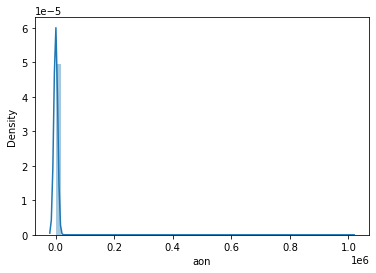

daily_decr30
3.9070142937955494


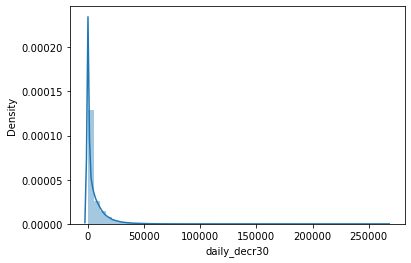

daily_decr90
4.230257595162529


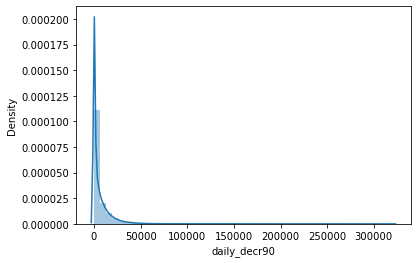

rental30
4.514596004946359


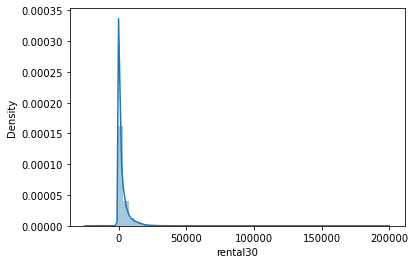

rental90
4.43389258391041


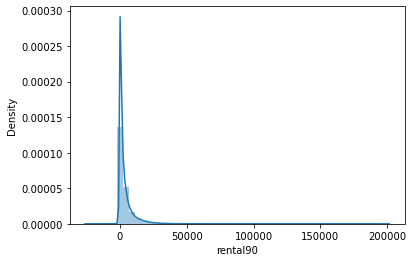

last_rech_date_ma
14.790370955953444


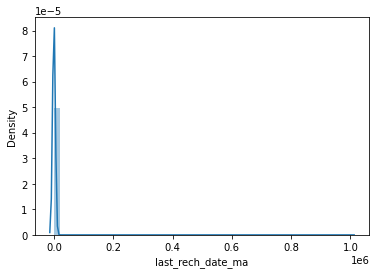

last_rech_date_da
14.813351579813913


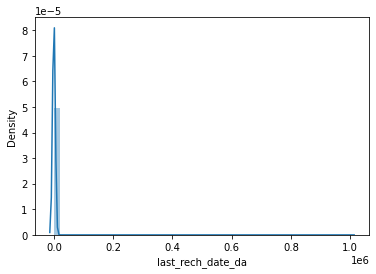

last_rech_amt_ma
3.7881216032831997


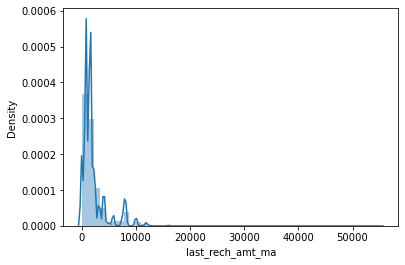

cnt_ma_rech30
2.8391192497588


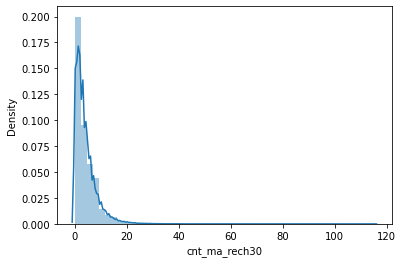

fr_ma_rech30
14.757715244980398


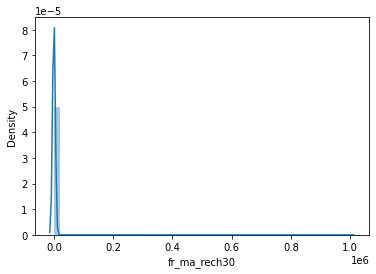

sumamnt_ma_rech30
6.36083177014148


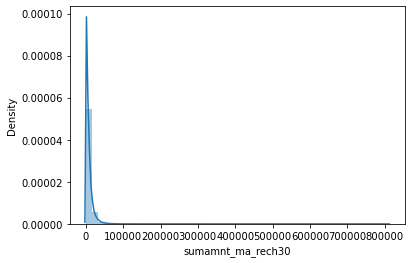

medianamnt_ma_rech30
3.4659213315786017


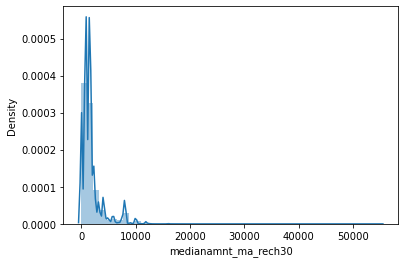

medianmarechprebal30
14.772612636046945


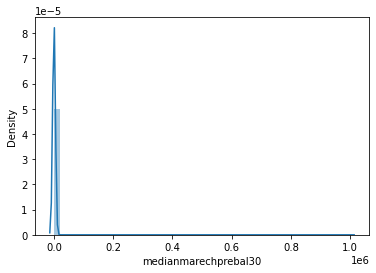

cnt_ma_rech90
3.0100305734677475


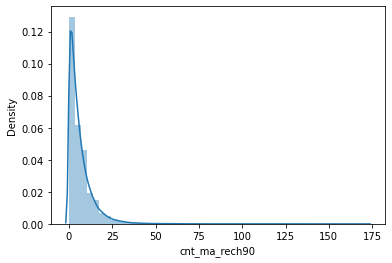

fr_ma_rech90
2.2845743520812825


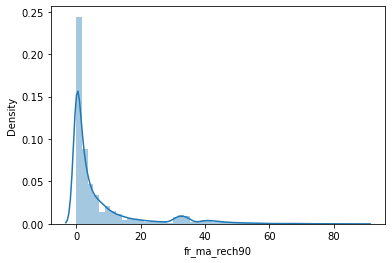

sumamnt_ma_rech90
4.870386720621399


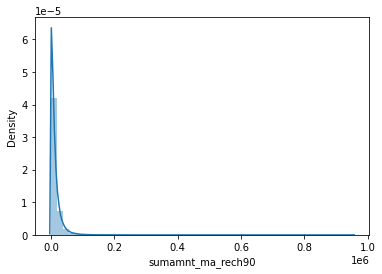

medianamnt_ma_rech90
3.7012010775259


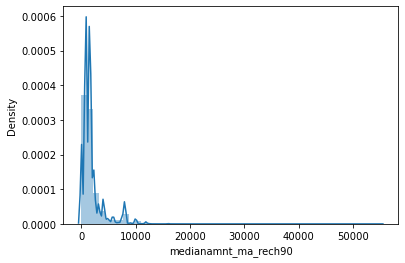

medianmarechprebal90
7.7202241343827795


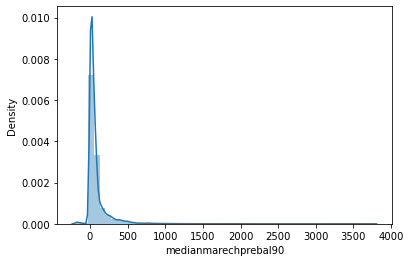

cnt_da_rech30
17.81368507927432


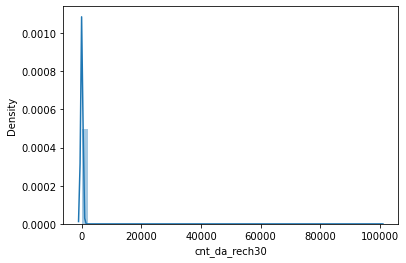

fr_da_rech30
14.768841403732772


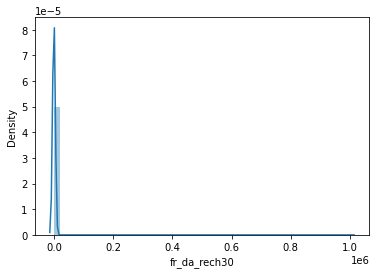

cnt_da_rech90
27.264037701504705


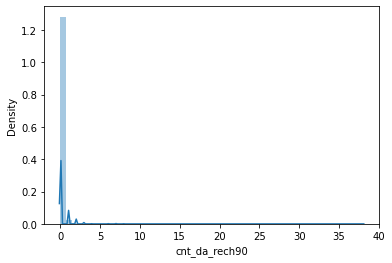

fr_da_rech90
29.087904278627928


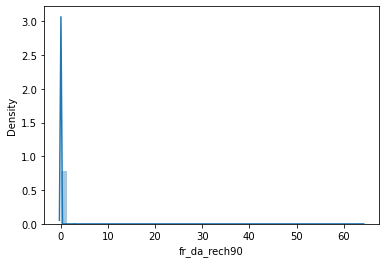

cnt_loans30
2.711251987138521


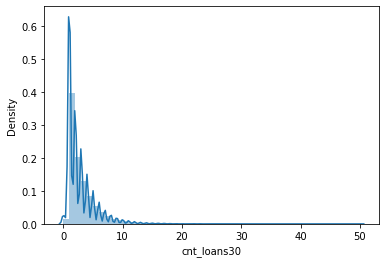

amnt_loans30
2.9735314786423586


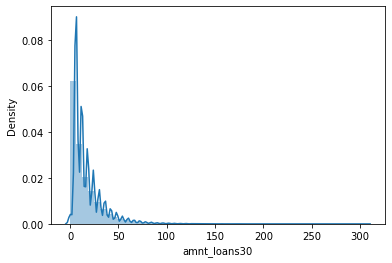

maxamnt_loans30
17.665497625692446


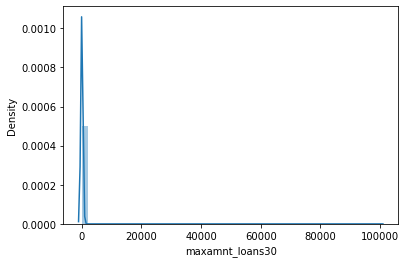

medianamnt_loans30
4.552998753887627


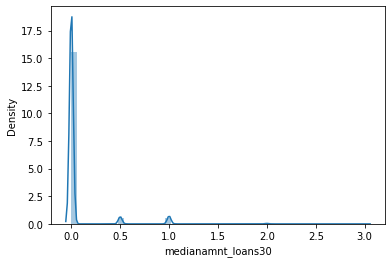

cnt_loans90
16.595133958445782


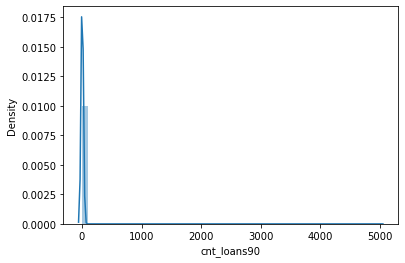

amnt_loans90
3.1474483062341125


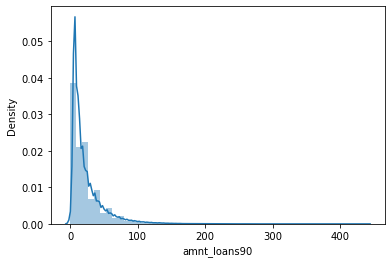

maxamnt_loans90
1.6800545987195836


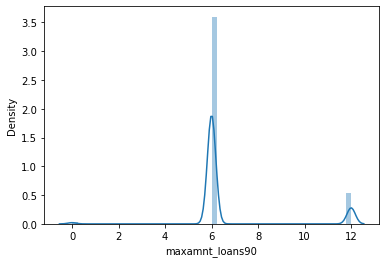

medianamnt_loans90
4.899141552809952


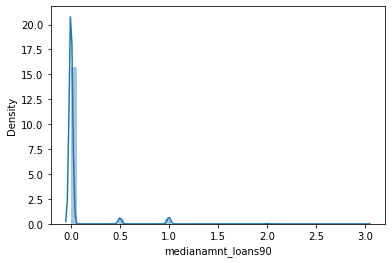

payback30
8.306400405856333


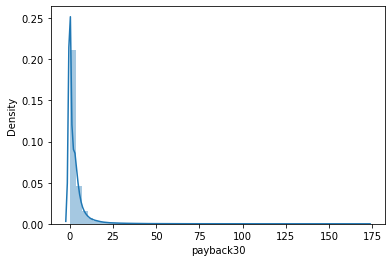

payback90
6.898738186584777


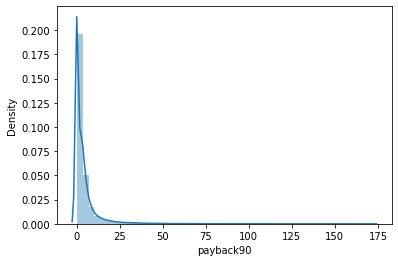

In [34]:
#Distplot for all the columns
for col in new_df11:
    print(col)
    print(skew(new_df11[col]))
    plt.figure()
    sn.distplot(new_df11[col])
    plt.show()

aon
10.392516636600261


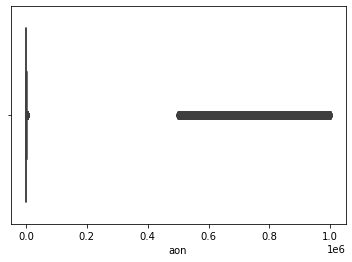

daily_decr30
3.9070142937955494


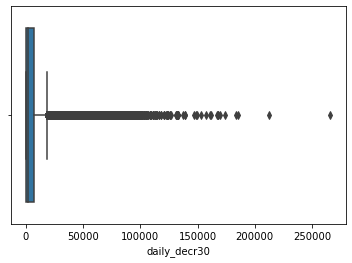

daily_decr90
4.230257595162529


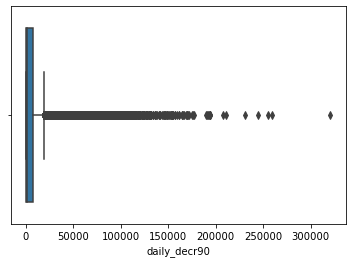

rental30
4.514596004946359


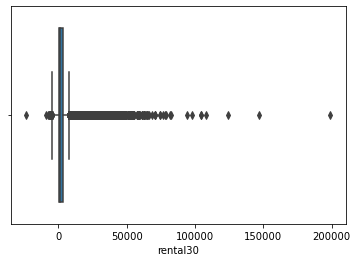

rental90
4.43389258391041


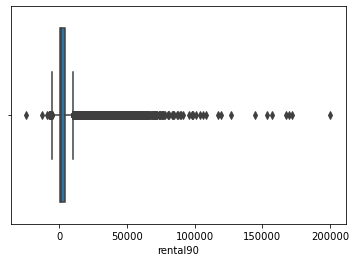

last_rech_date_ma
14.790370955953444


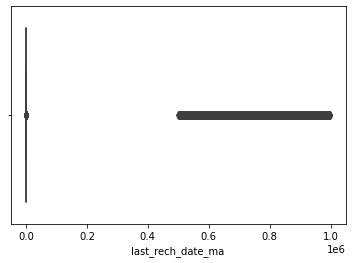

last_rech_date_da
14.813351579813913


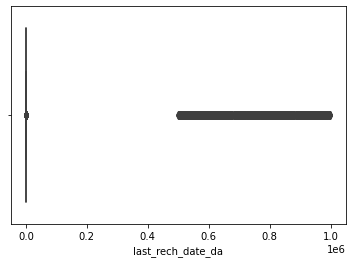

last_rech_amt_ma
3.7881216032831997


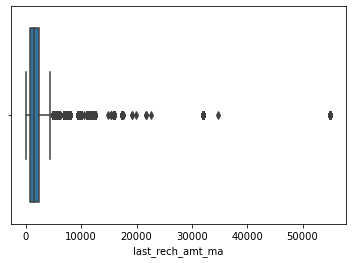

cnt_ma_rech30
2.8391192497588


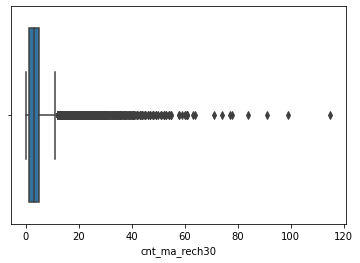

fr_ma_rech30
14.757715244980398


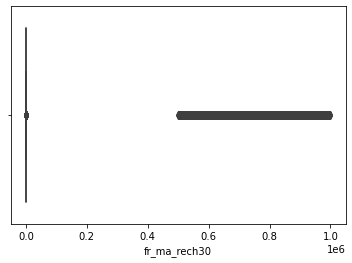

sumamnt_ma_rech30
6.36083177014148


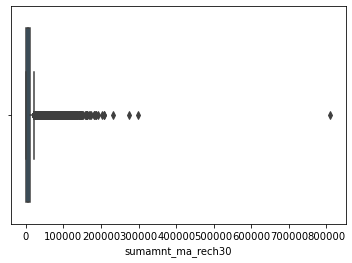

medianamnt_ma_rech30
3.4659213315786017


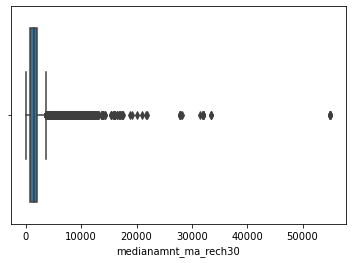

medianmarechprebal30
14.772612636046945


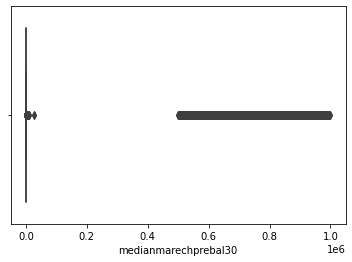

cnt_ma_rech90
3.0100305734677475


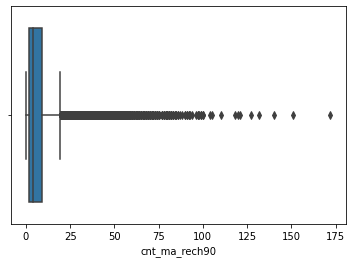

fr_ma_rech90
2.2845743520812825


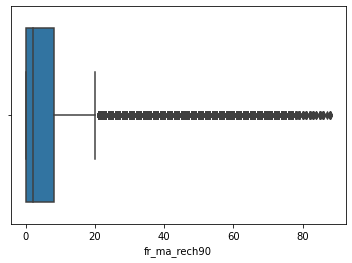

sumamnt_ma_rech90
4.870386720621399


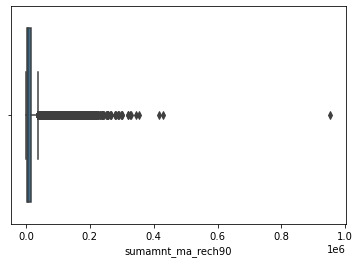

medianamnt_ma_rech90
3.7012010775259


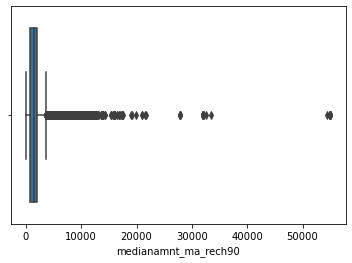

medianmarechprebal90
7.7202241343827795


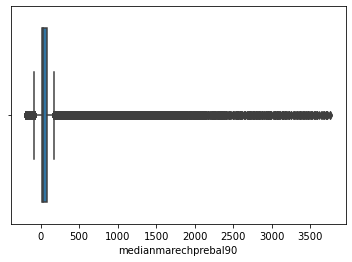

cnt_da_rech30
17.81368507927432


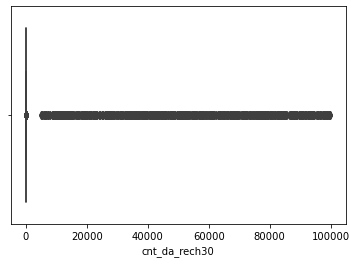

fr_da_rech30
14.768841403732772


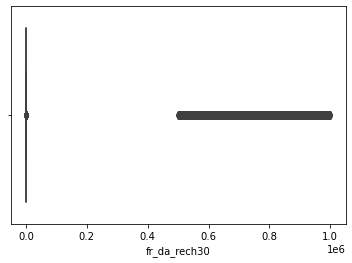

cnt_da_rech90
27.264037701504705


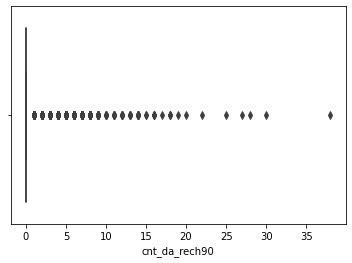

fr_da_rech90
29.087904278627928


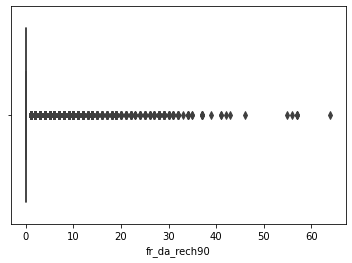

cnt_loans30
2.711251987138521


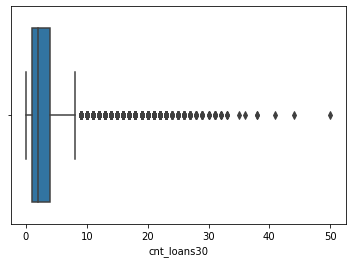

amnt_loans30
2.9735314786423586


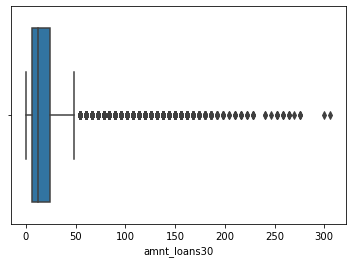

maxamnt_loans30
17.665497625692446


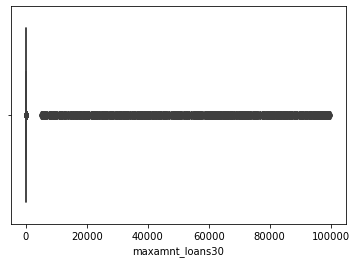

medianamnt_loans30
4.552998753887627


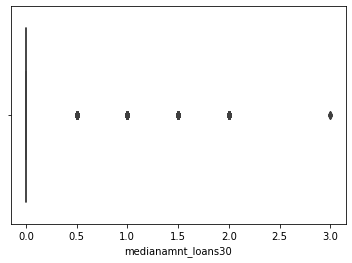

cnt_loans90
16.595133958445782


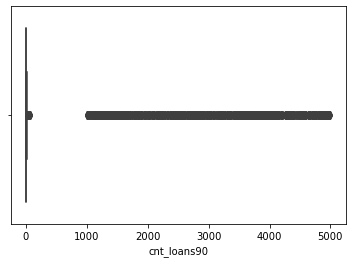

amnt_loans90
3.1474483062341125


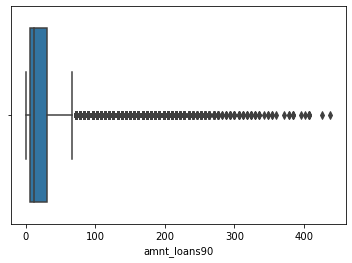

maxamnt_loans90
1.6800545987195836


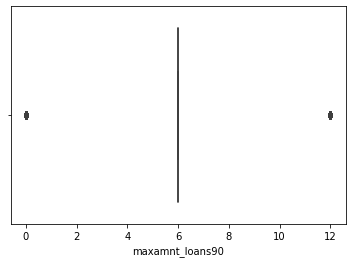

medianamnt_loans90
4.899141552809952


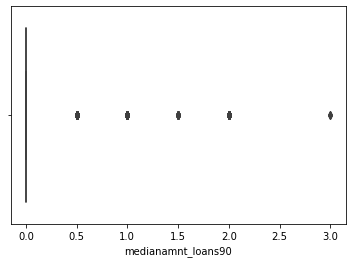

payback30
8.306400405856333


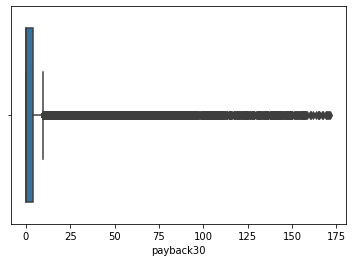

payback90
6.898738186584777


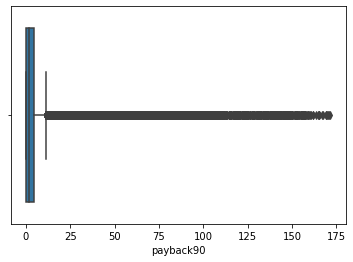

In [35]:
#Boxplot for all the columns
for col in new_df11:
    print(col)
    print(skew(new_df11[col]))
    plt.figure()
    sn.boxplot(new_df11[col])
    plt.show()

In [36]:
x1=df.drop("pcircle",axis=1)

In [37]:
x2=x1.drop("pdate",axis=1)

In [38]:
x3=x2.drop("Unnamed: 0",axis=1)

In [39]:
x4=x3.drop("label",axis=1)

In [40]:
x=x4.drop("msisdn",axis=1)
y=df["label"]

## Class Imbalancement

In [84]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [85]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()##SMOTE(k_neighbours=4) if error  expected k_neighbours
# Transform the dataset
x, y = oversample.fit_resample(x, y)

In [86]:
y.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [88]:
# To Find the random state from 1-200
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state",i)

89.4792053855367 at random_state 0
89.03481600792963 at random_state 1
89.31070086317267 at random_state 2
89.2718787428241 at random_state 3
89.41642919093049 at random_state 4
89.26857473258167 at random_state 5
89.34456696815761 at random_state 6
89.38751910130921 at random_state 7
89.47755338041547 at random_state 8
89.14467434849048 at random_state 9
89.51472349564284 at random_state 10
89.26031470697559 at random_state 11
89.38338908850618 at random_state 12
89.31400487341512 at random_state 13
89.49737744187007 at random_state 14
89.4263412216578 at random_state 15
89.3966051294759 at random_state 16
89.57915169537026 at random_state 17
89.27600875562715 at random_state 18
89.53702556477924 at random_state 19
89.41808119605172 at random_state 20
89.13311031264197 at random_state 21
89.32722091438482 at random_state 22
89.34456696815761 at random_state 23
89.32061289389998 at random_state 24
89.38091108082435 at random_state 25
89.28179077355139 at random_state 26
89.331350927187

In [89]:
# To Find the best random state from 1-200
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is", maxAccu, "on random_state",maxRS)

Best Accuracy is 0.8984998955105897 on random_state 82


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state =82)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [101]:
#Decision Tree classsifier algorithm
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     54873
           1       0.90      0.89      0.90     55186

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059



In [102]:
#Random forest classsifier algorithm
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     54873
           1       0.93      0.95      0.94     55186

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



In [103]:
#Support vector classifier alogorithm
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=9, tol=1e-5)
clf.fit(x_train, y_train.ravel()) 
pred = clf.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.55      0.96      0.70     54873
           1       0.83      0.21      0.33     55186

    accuracy                           0.58    110059
   macro avg       0.69      0.58      0.51    110059
weighted avg       0.69      0.58      0.51    110059



In [110]:
from sklearn.model_selection import cross_val_score

In [105]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8918586905925414


In [107]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9370582779313734


In [108]:
print(cross_val_score(clf,x,y,cv=5).mean())

0.5648178731283748


In [112]:
#DTC accuracy score-Cross_val_score
90-89.1

0.9000000000000057

In [113]:
#RFC accuracy score-Cross_val_score
94-93.7

0.29999999999999716

In [114]:
#SVC accuracy score-Cross_val_score
58-56.4

1.6000000000000014

After subtracting the accuracy and cross_val_score we can see Random Forest classifier is best suited Model

### Hyper parameter tuning

In [115]:
#Hyper parametertuning to omprovise the accuracy of the model
from sklearn.model_selection import GridSearchCV

In [116]:
parameter = { 'max_depth':np.arange(2,10),
               'criterion':['gini','entropy']}

In [123]:
GVC=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [ ]:
GVC.fit(x_train, y_train)

In [ ]:
#To find the best max_depth for the model
GVC.best_params_

In [126]:
Final_mod = RandomForestClassifier(criterion= 'entropy', max_depth= 9)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

86.89430214703023


In [127]:
import pickle
  
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(RFC)
  
# Load the pickled model
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded pickled model to make predictions
Final_mod_from_pickle.predict(x_test)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)